### 4.6 Utilizing Expert Knowledge
- 도메인 전문가는 초기 데이터에서 더 유용한 특성을 선별하는 데 많은 도움을 줄 수 있음

- 뉴욕시티 자전거 대여 데이터를 사용한 문제
  - https://www.citibikenyc.com/system-data
  - 문제
    - 특정 날짜와 시간에 앤디 집 앞에 있는 자전거를 사람들이 얼마나 대여하는지 예측
    - 그래서, 앤디가 빌릴 수 있는 자전거가 남아 있는지 예측

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [3]:
citibike = mglearn.datasets.load_citibike()
print("citibike.data.shape:", citibike.shape)
print(type(citibike))

citibike.data.shape: (248,)
<class 'pandas.core.series.Series'>


In [4]:
print("Citibike data:\n{}".format(citibike.head()))

Citibike data:
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


- 8월 한달 동안의 대여 횟수

In [5]:
plt.figure(figsize=(10, 3))

xticks = pd.date_range(
    start=citibike.index.min(), 
    end=citibike.index.max(),
    freq='D'
)

print(xticks)

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')


<Figure size 3000x900 with 0 Axes>

In [6]:
import matplotlib
import matplotlib.font_manager

font_list = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(len(font_list))

font_list

357


['STIXSizeFourSym',
 'cmtt10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmsy10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmr10',
 'STIXGeneral',
 'DejaVu Sans',
 'cmss10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'cmex10',
 'cmmi10',
 'DejaVu Sans',
 'STIXGeneral',
 'cmb10',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXSizeOneSym',
 '.SF Compact Text',
 'Tahoma',
 'Raleway',
 'Times New Roman',
 'STIXSizeTwoSym',
 'Herculanum',
 'System Font',
 'Exo',
 'Bebas Neue',
 'Quicksand',
 'System Font',
 'Noto Sans',
 '.SF Compact Display',
 'Ultra',
 'Petit Formal Script',
 'Bebas Neue',
 'Bradley Hand',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Comp

Text(0,0.5,'Rentals')

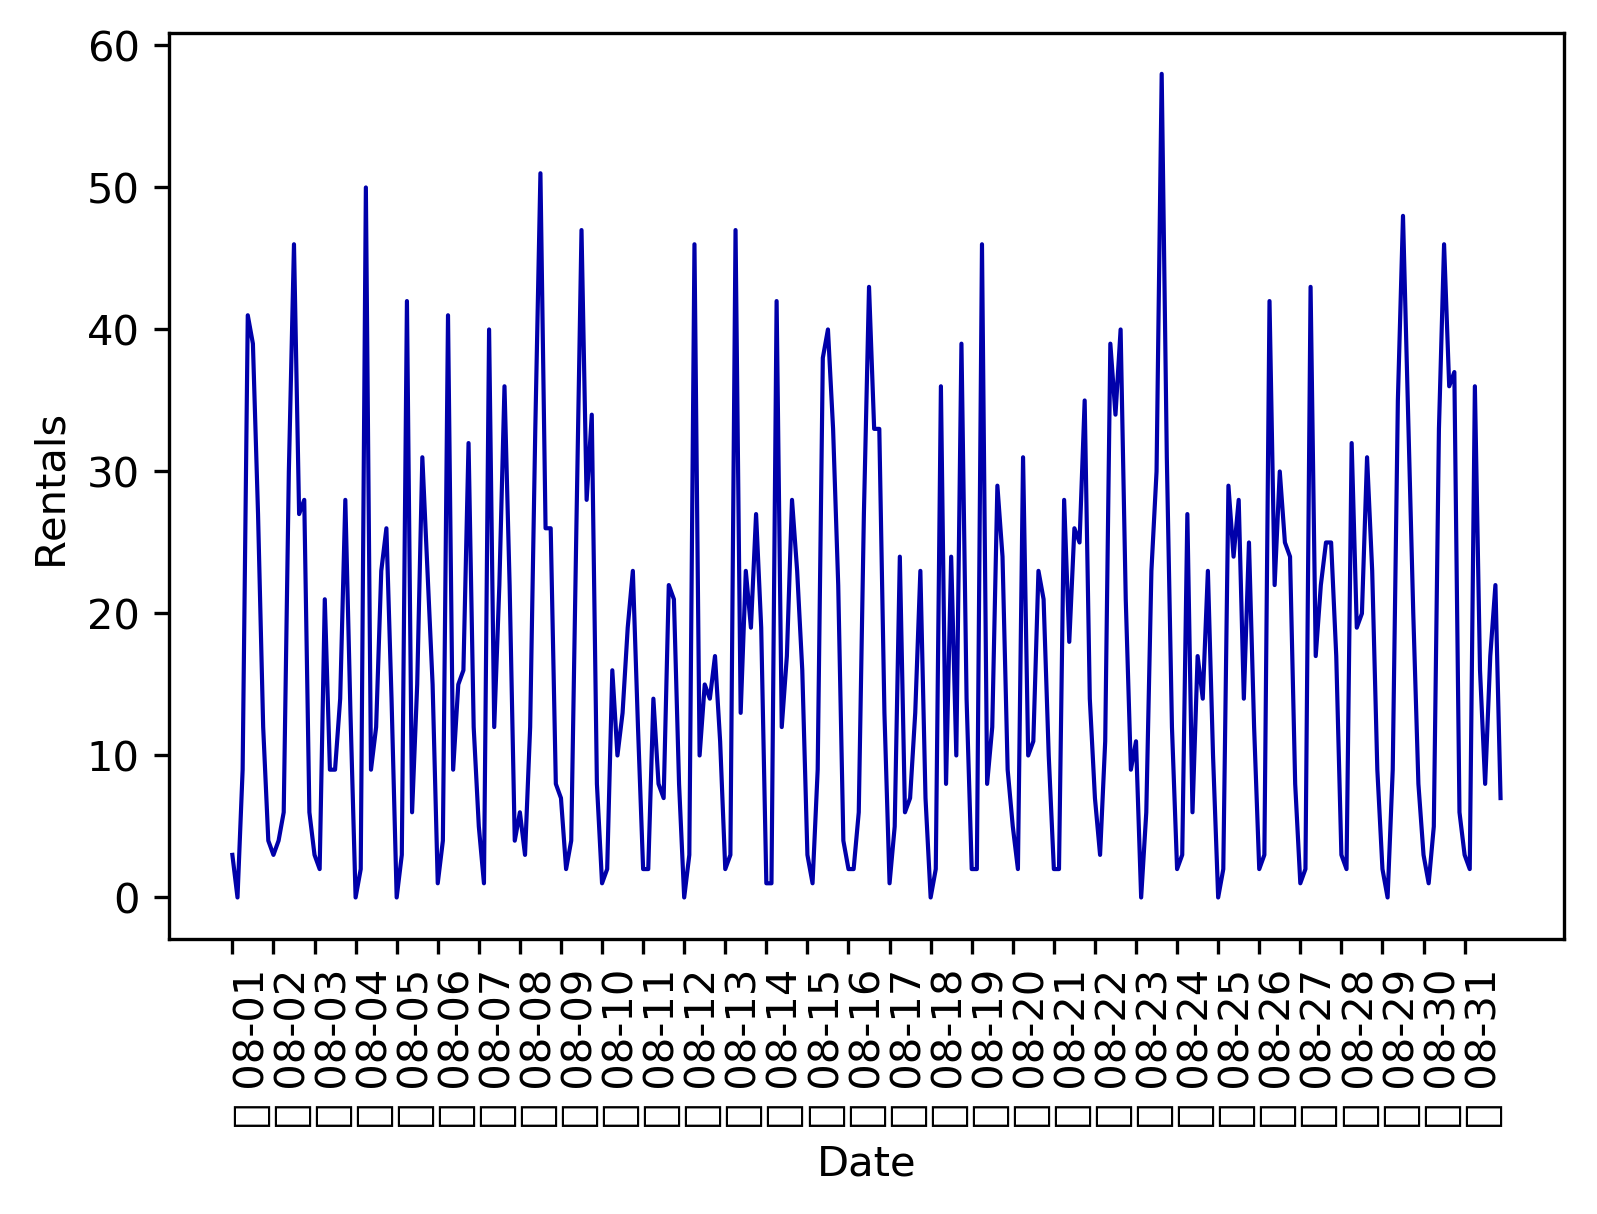

In [8]:
week = ["일", "월", "화", "수", "목", "금", "토"]
xtick_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xtick_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [9]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [10]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array 
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


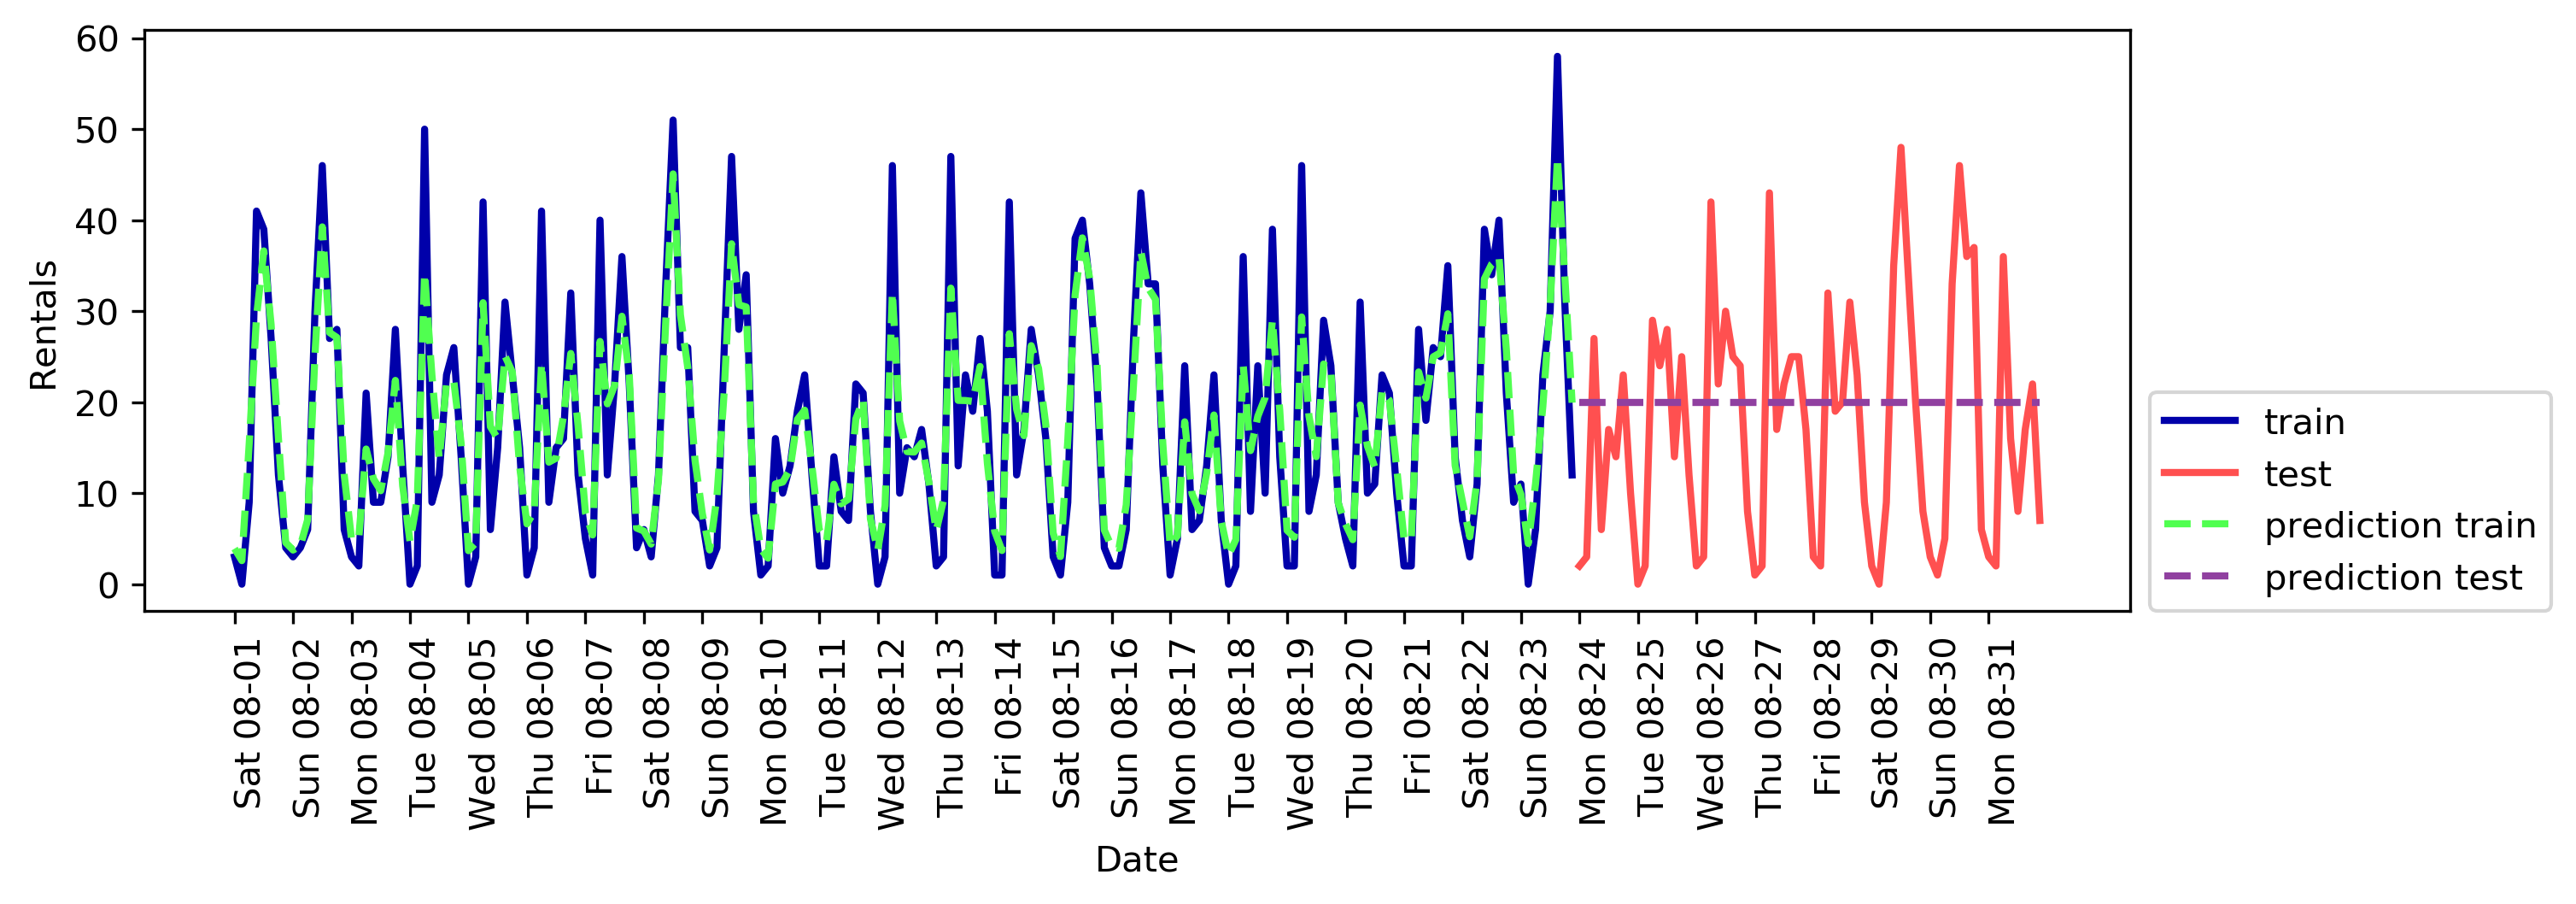

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


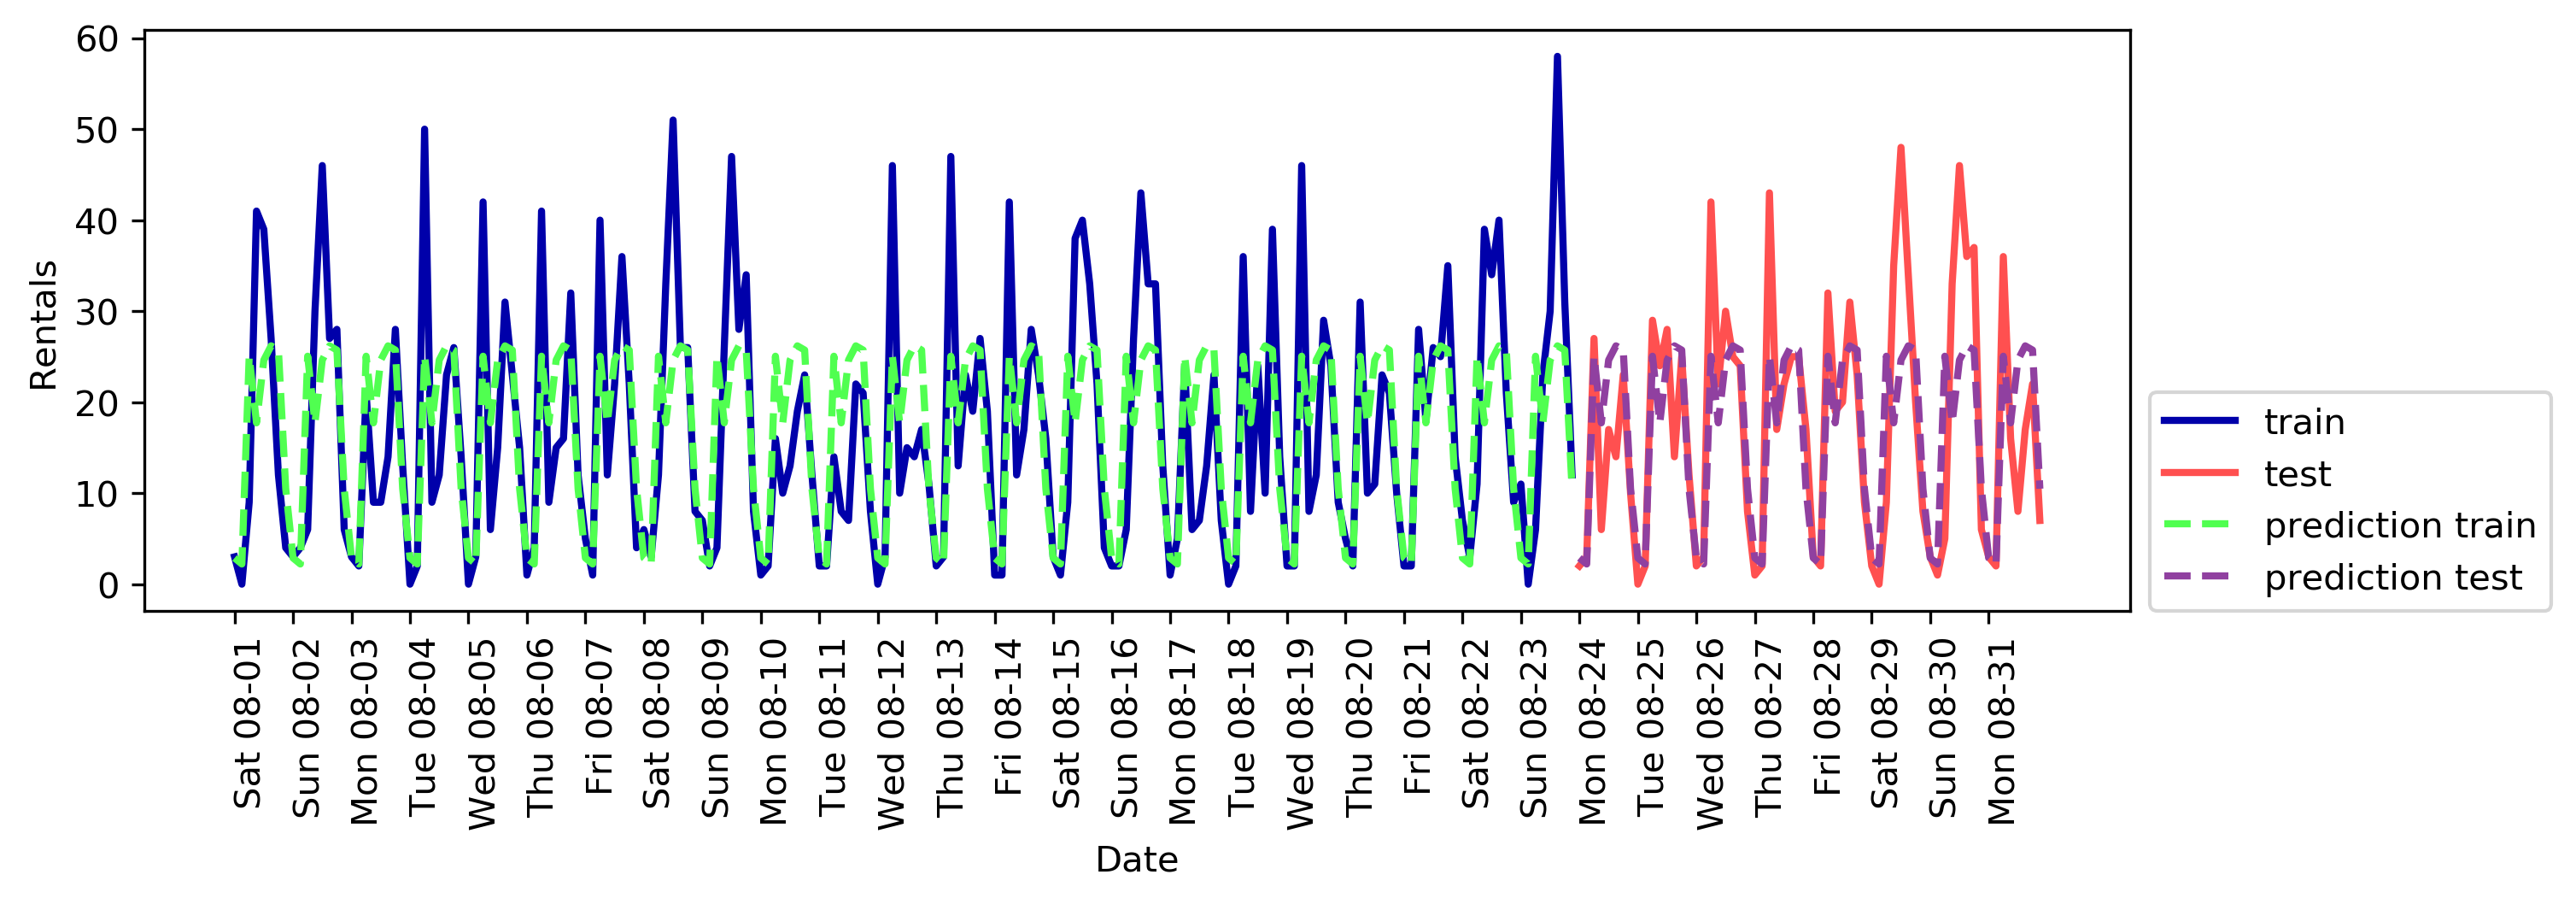

In [12]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


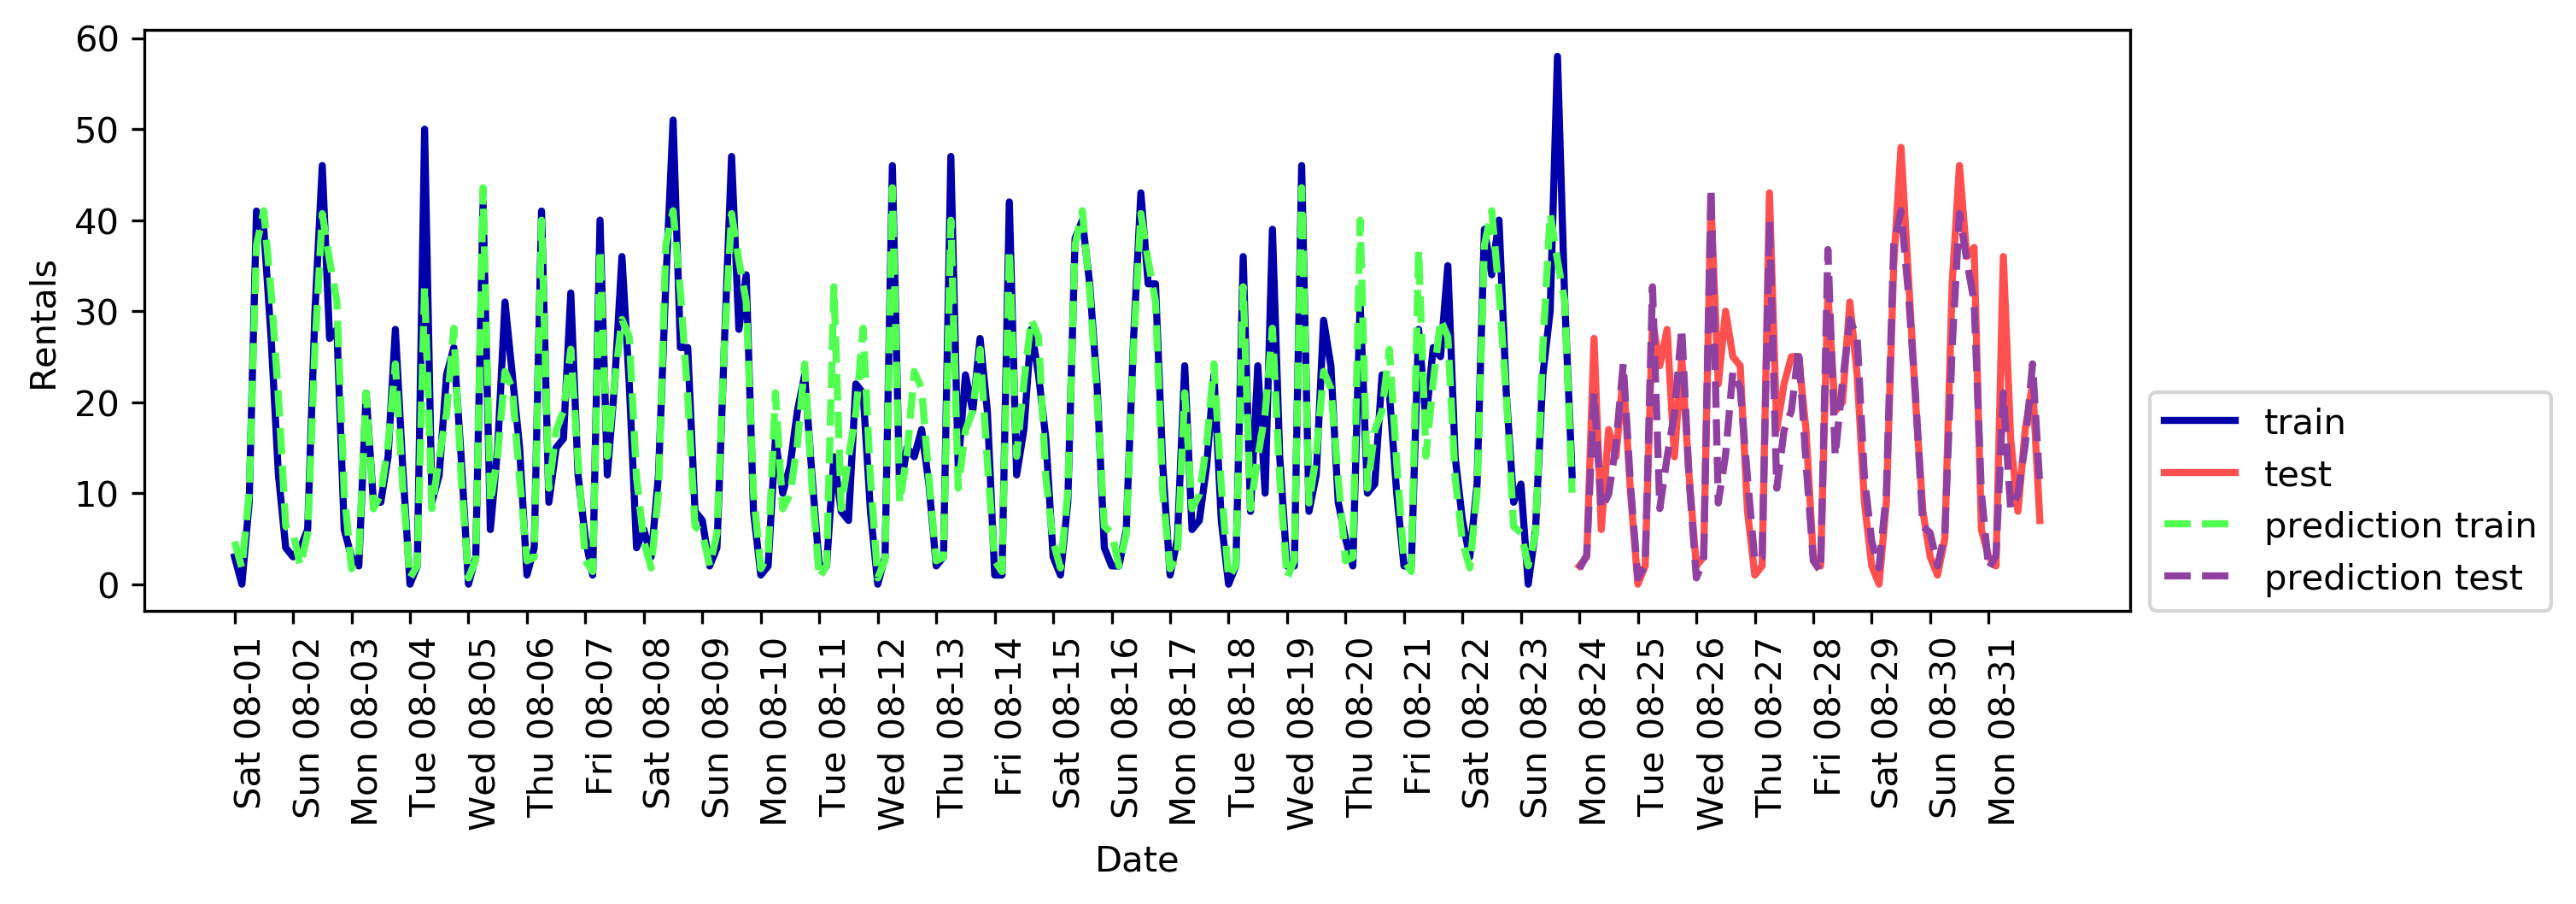

In [13]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


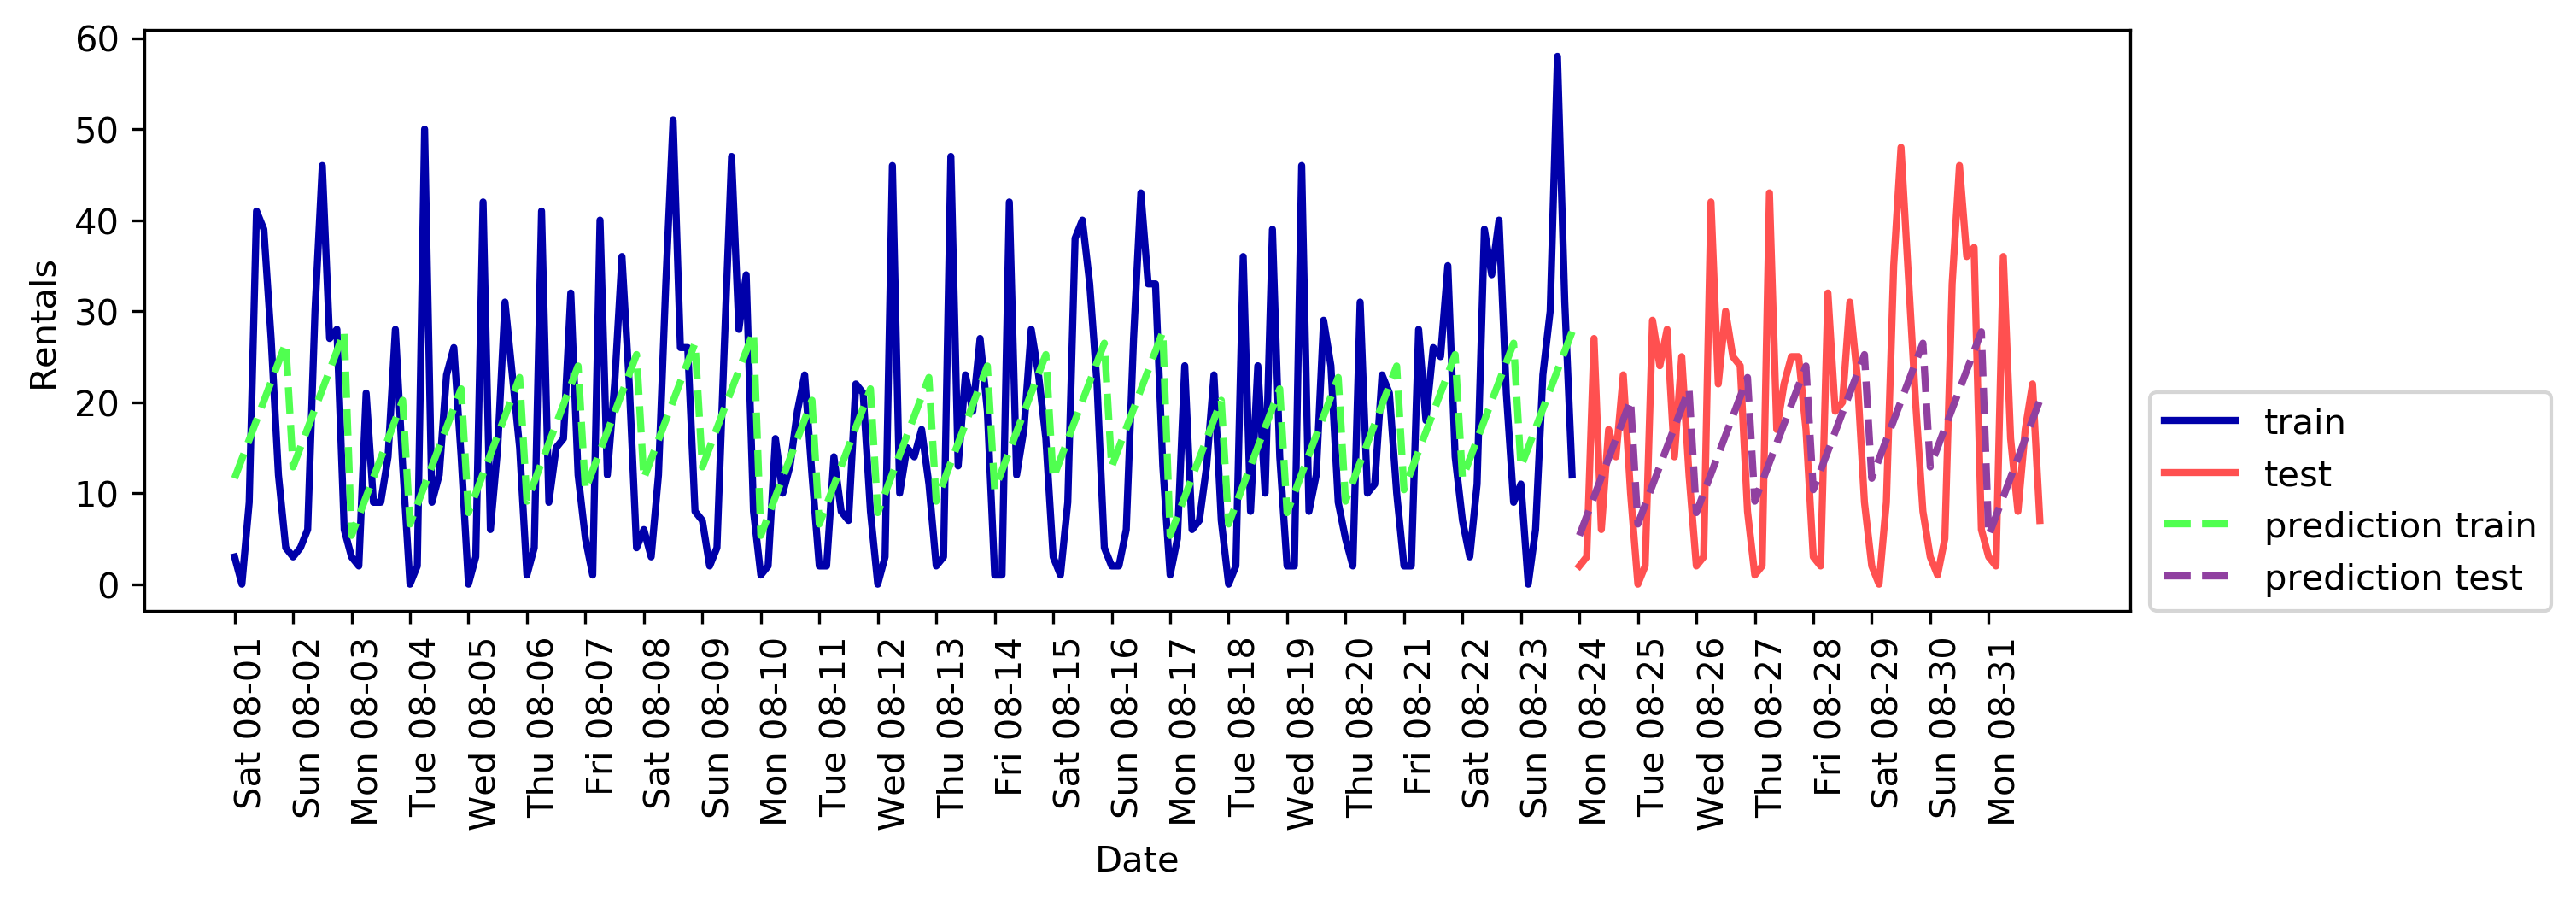

In [14]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


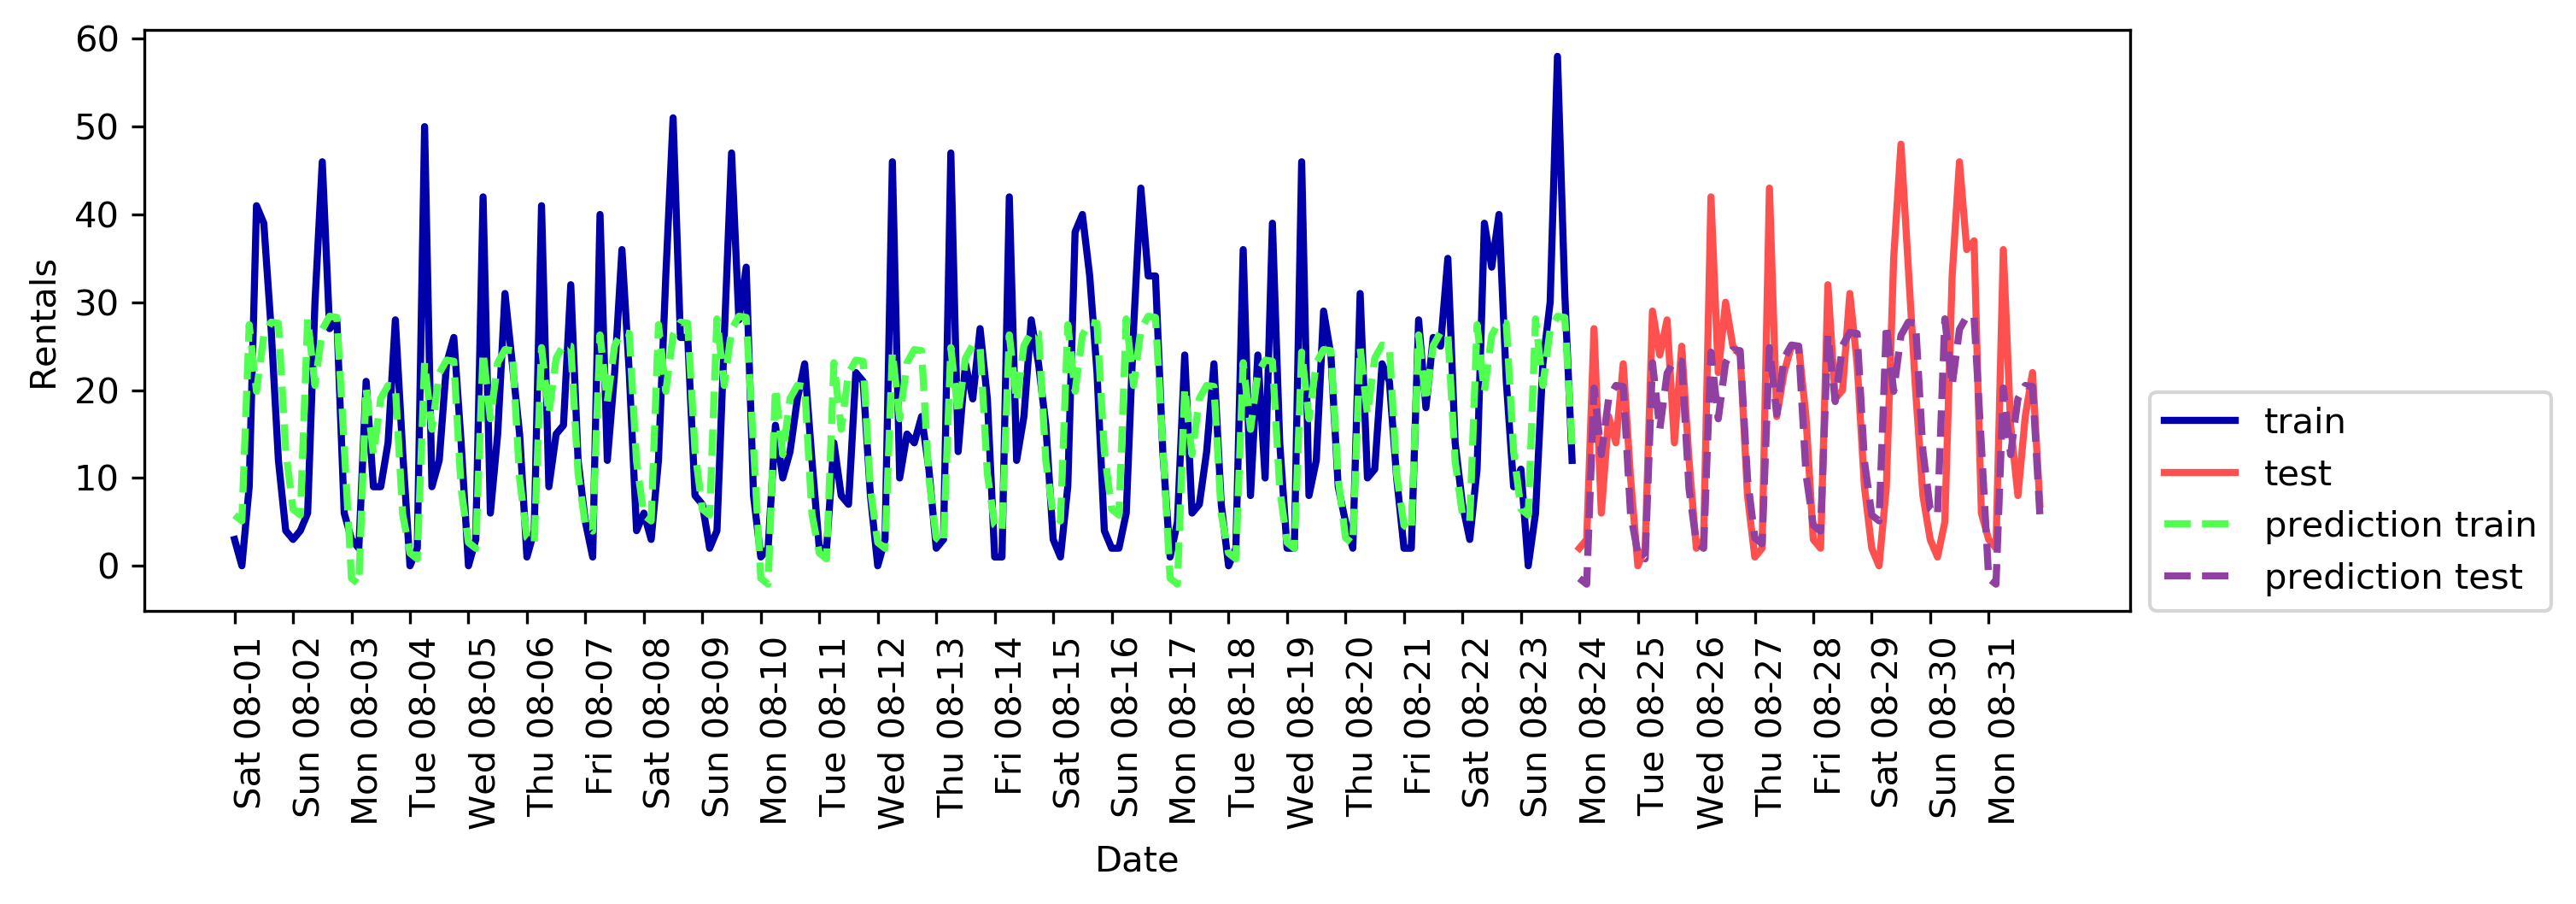

In [18]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


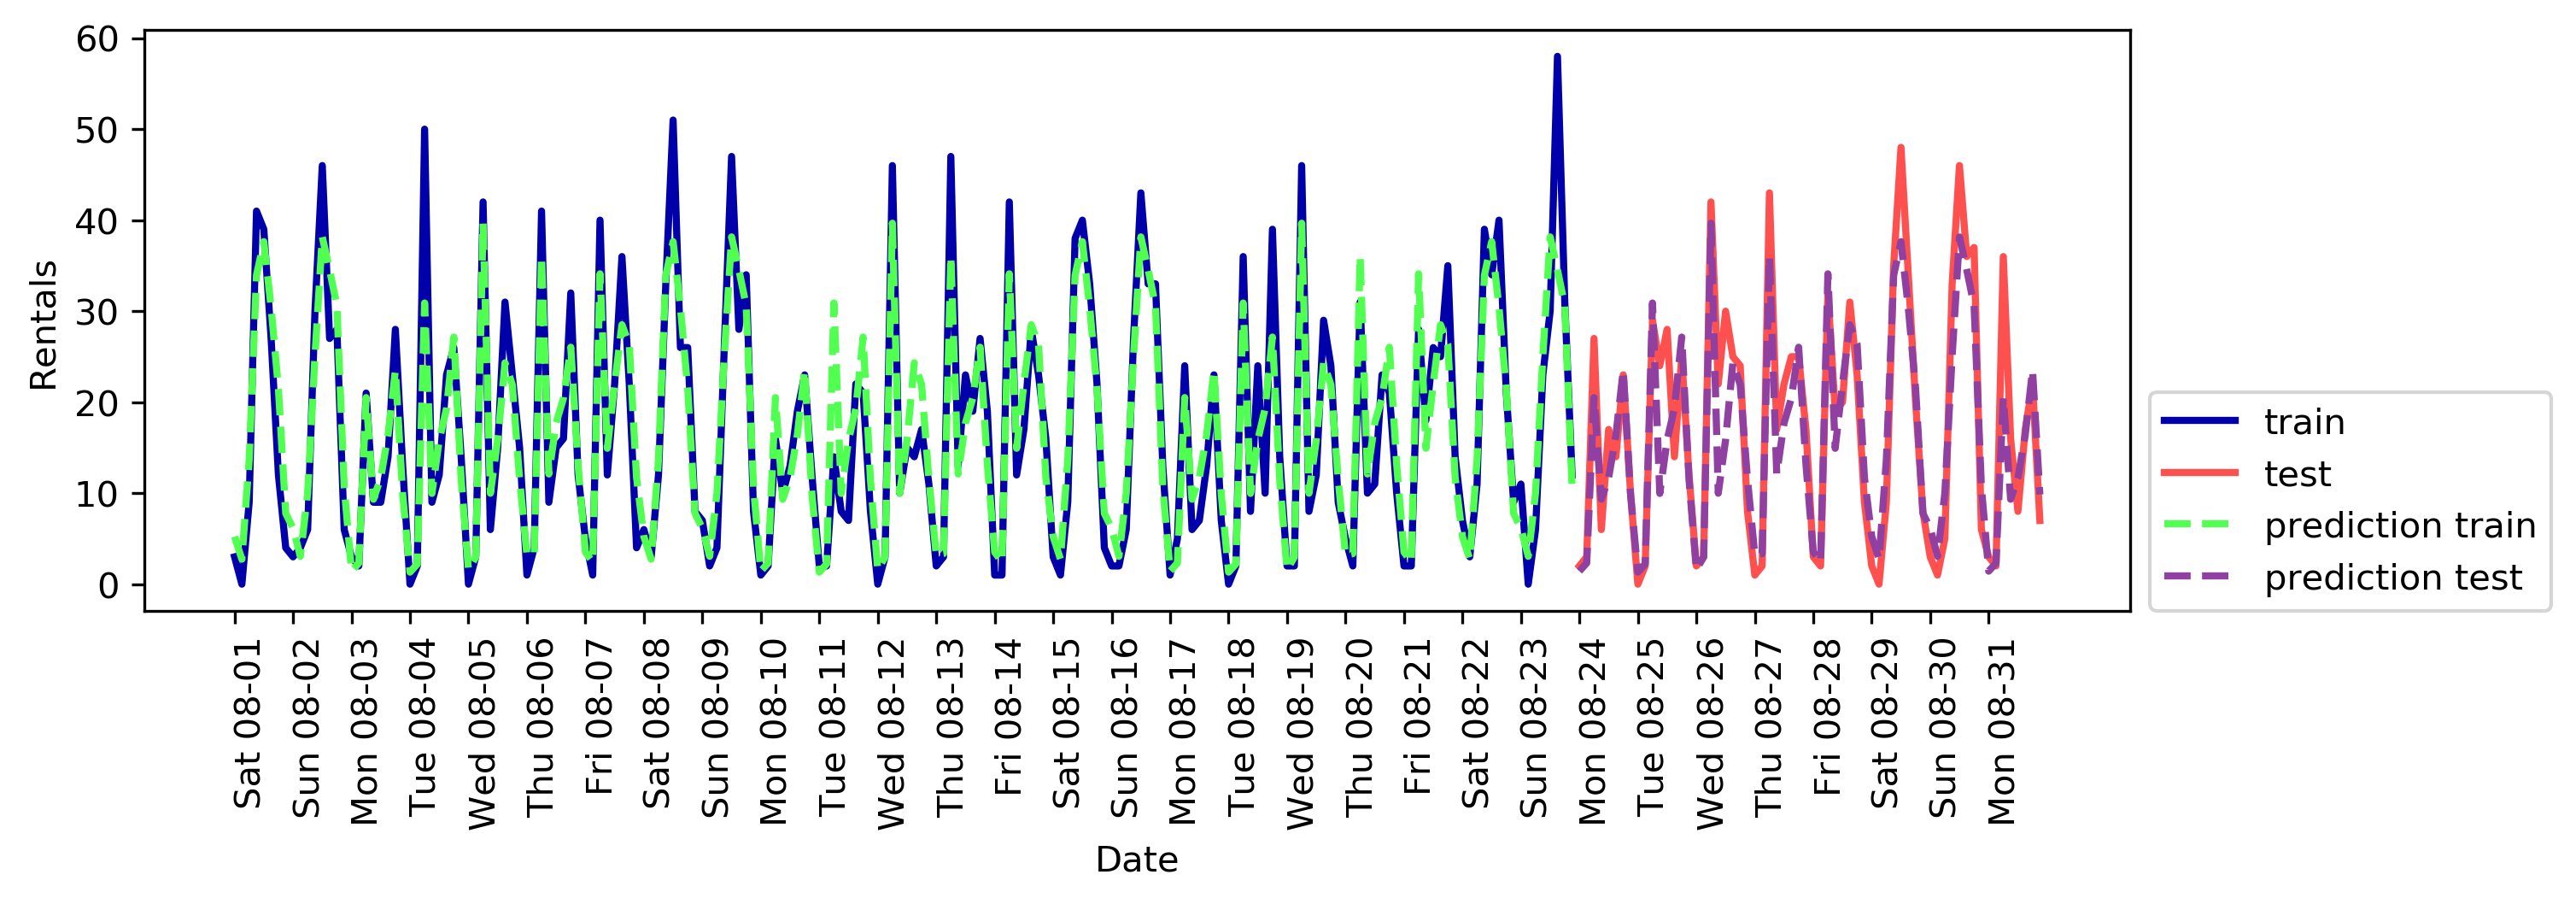

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [21]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [22]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'Feature magnitude')

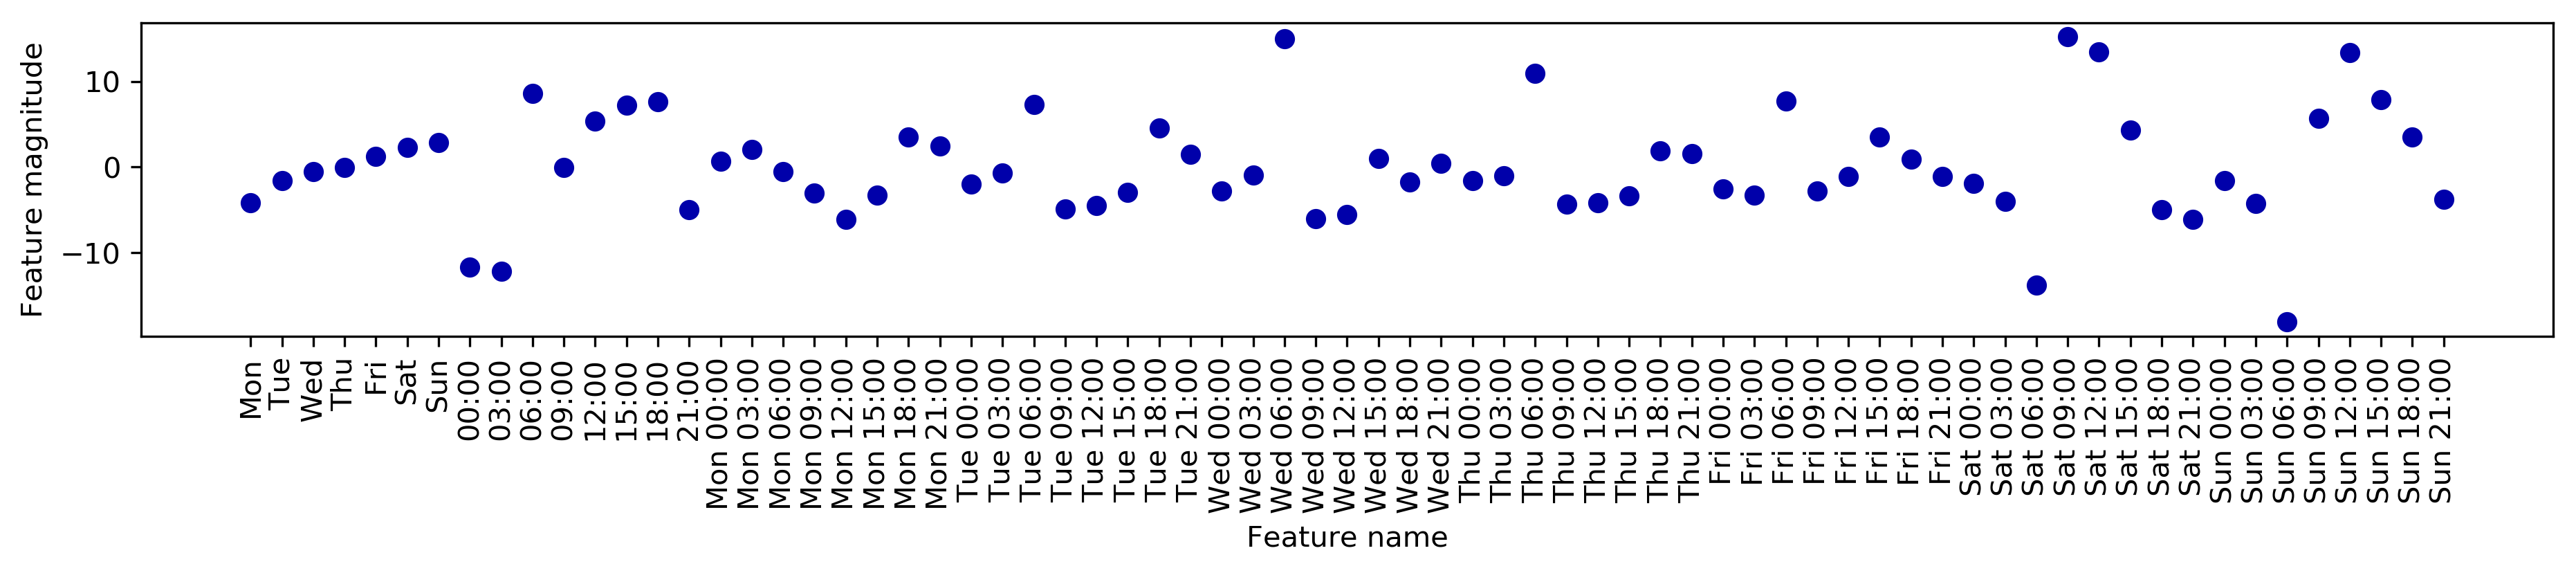

In [23]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")